## Regression / Exercise 8

In [100]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns

## Task 1

In [32]:
df = pd.read_csv("data_regression.txt", sep=",", index_col=0)
df.head(10)

,X,Y
id,,
1,17,39
2,20,36
3,14,34
4,13,35
5,10,25
6,25,43
7,8,26
8,4,7
9,7,16


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 1 to 10
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X       10 non-null     int64
 1   Y       10 non-null     int64
dtypes: int64(2)
memory usage: 240.0 bytes


In [8]:
#Find the sample X mean:
print(df['X'].mean())

12.7


In [9]:
#Find the sample Y mean:
print(df['Y'].mean())

28.3


In [44]:
X = np.array(df.X).reshape(-1, 1)
Y = np.array(df.Y).reshape(-1, 1)

In [22]:
# Train the linear regression model to predict the values and enter the specified parameters.
reg = LinearRegression().fit(X, Y)
print(f'R^2 equals = {round(reg.score(X, Y), 2)}')

R^2 equals = 0.82


In [31]:
print(f'Zero coef = {reg.intercept_}\nFirst coef = {reg.coef_}')

Zero coef = [8.3467163]
First coef = [[1.5711247]]


## Task 2

#### The provided dataset consists of seven different types of fish sold in some fish shop. The goal is to predict the mass of the fish from some indirect features known about the fish. The features themselves may need to be synthesized from those that are known.

#### IMPORTANT: Tasks with detailed explanations are presented in the notebook. When completing tasks in the notebook, you should enter your answers in the appropriate input boxes below. It is recommended that you enter the answers step by step, with a sufficient number of attempts provided for this purpose.

#### Use train_test_split() to split the dataset into training and test samples with parameters test_size=0.2, random_state=27. Use stratification by column Species. Stratification will maintain the proportions of represented objects (by fish type representatives) in the training and test samples.

In [33]:
df2 = pd.read_csv("fish_train.csv")
df2.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Roach,150.0,20.4,22.0,24.7,5.8045,3.7544
1,Perch,250.0,25.4,27.5,28.9,7.2828,4.5662
2,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
3,Bream,925.0,36.2,39.5,45.3,18.7542,6.7497
4,Perch,110.0,19.0,21.0,22.5,5.6925,3.5550


In [35]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  119 non-null    object 
 1   Weight   119 non-null    float64
 2   Length1  119 non-null    float64
 3   Length2  119 non-null    float64
 4   Length3  119 non-null    float64
 5   Height   119 non-null    float64
 6   Width    119 non-null    float64
dtypes: float64(6), object(1)
memory usage: 6.6+ KB


In [36]:
df2.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
mean,405.177311,26.594958,28.781513,31.602521,9.092096,4.507407
std,338.834252,9.613002,10.308208,11.116086,4.231866,1.678796
min,0.000000,7.500000,8.400000,8.800000,1.738800,1.047600
25%,142.500000,20.000000,22.000000,23.500000,6.138850,3.536400
50%,300.000000,25.400000,27.500000,30.600000,8.145400,4.335000
75%,685.000000,33.850000,36.450000,40.150000,12.143400,5.789550
max,1550.000000,56.000000,60.000000,64.000000,18.957000,8.142000


In [95]:
X = df2.drop(columns=['Species','Weight'])
Y = df2['Weight']

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=27, stratify=df2['Species'])

In [97]:
# Find sample mean for the column Width of the obtained training sample.
# The decimal separator is a period. Round your answer to three decimal places.
print(round(X_train['Width'].mean(),3))

4.558


## 1. Building a base model

### Remove categorical features and train a linear regression model on the training dataset. Perform predictions on the test dataset.
### Evaluate the model using the metric r2_score().

### Enter r2_score() of the obtained model.
### The decimal separator is a period. Round your answer to three decimal places.

In [98]:
base_model = LinearRegression().fit(X_train, y_train)

In [99]:
print(round(r2_score(y_test, base_model.predict(X_test)),3))

0.801


<Axes: >

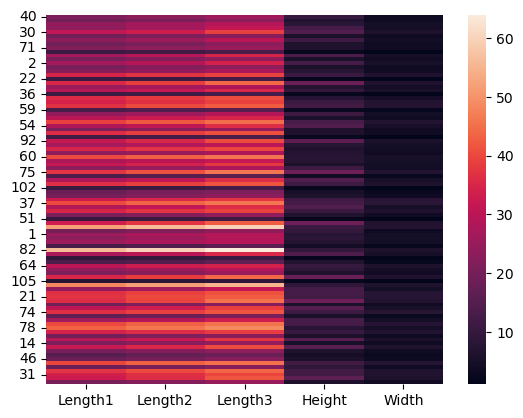

In [101]:
sns.heatmap(X_train)